In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sn
%matplotlib inline

In [2]:
ass = pd.read_csv("./cleaned data/AS.csv", low_memory=False, index_col=False)
mp = pd.read_csv("./cleaned data/MP.csv", low_memory=False, index_col=False)
up = pd.read_csv("./cleaned data/UP.csv", low_memory=False, index_col=False)
jh = pd.read_csv("./cleaned data/JH.csv", low_memory=False, index_col=False)
rj = pd.read_csv("./cleaned data/RJ.csv", low_memory=False, index_col=False)
bh = pd.read_csv("./cleaned data/BH.csv", low_memory=False, index_col=False)
cg = pd.read_csv("./cleaned data/CG.csv", low_memory=False, index_col=False)
od = pd.read_csv("./cleaned data/OD.csv", low_memory=False, index_col=False)
ut = pd.read_csv("./cleaned data/UT.csv", low_memory=False, index_col=False)

In [54]:
result = pd.concat([ut, cg, jh, ass, od, rj, mp, bh, up])

In [55]:
result.shape

(120969, 16)

In [56]:
result[result['illness_type'] != 0].shape

(33862, 16)

In [57]:
result = result[result['illness_type'] != 0]

In [58]:
result.shape

(33862, 16)

## Model Training

In [60]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

from sklearn.metrics import confusion_matrix

In [61]:
x_train, x_test, y_train, y_test = train_test_split(result.drop('illness_type', axis=1), result['illness_type'], test_size=0.3, random_state=22)

In [62]:
x_train.shape, y_train.shape

((23703, 15), (23703,))

In [63]:
x_test.shape, y_test.shape

((10159, 15), (10159,))

In [64]:
x_train['state_code'].value_counts()

9.0     8417
21.0    3898
10.0    2880
23.0    2471
8.0     1846
22.0    1552
20.0    1423
5.0      673
18.0     543
Name: state_code, dtype: int64

In [65]:
svc = SVC()
l_svc = LinearSVC()
knc = KNeighborsClassifier(n_neighbors=49)
dtc = DecisionTreeClassifier(min_samples_split=300, random_state=200)
lrc = LogisticRegression()
rfc = RandomForestClassifier(n_estimators=231, random_state=200)

In [66]:
clfs = {'SVC' : svc, 'Linear SVC' : l_svc, 'KN' : knc, 'DT': dtc, 'LR': lrc, 'RF': rfc}

In [67]:
def train_classifier(clf, feature_train, labels_train):    
    clf.fit(feature_train, labels_train)
    return clf

In [68]:
def predict_labels(clf, features):
    return (clf.predict(features))

In [69]:
pred_scores = []
pds = []
# for k,v in clfs.items():
#     clf = train_classifier(v, x_train, y_train)
#     pred = predict_labels(v,x_test)
#     pred_scores.append((k, [accuracy_score(y_test,pred)]))
#     print(k," - ",clf.score(x_test, y_test))
#     cm = confusion_matrix(y_test, pred)
#     print(cm)
#     sn.heatmap(cm, annot=True)
#     plt.show()
#     print("---------------------------------------\n\n")

In [70]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [71]:
abc = AdaBoostClassifier(n_estimators=231, random_state=200)
bc = BaggingClassifier(n_estimators=231, random_state=200)
etc = ExtraTreesClassifier(n_estimators=231, random_state=200)

0.525248548085
[[1224 1098  401    2]
 [ 905 3182  552    3]
 [ 444  933  930    6]
 [  73  221  185    0]]


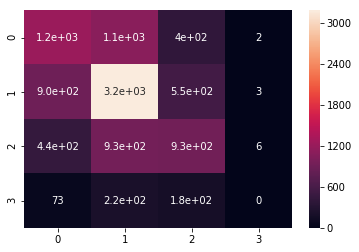

In [72]:
clf = train_classifier(abc, x_train, y_train)
pred = predict_labels(abc,x_test)
pred_scores.append(('ABC', [accuracy_score(y_test,pred)]))
print(clf.score(x_test, y_test))
cm = confusion_matrix(y_test, pred)
print(cm)
sn.heatmap(cm, annot=True)

Accuracy:  54.9660399646
Confusion Matrix: 
 [[1353  868  483   21]
 [ 909 3092  617   24]
 [ 544  614 1114   41]
 [ 108  178  168   25]]

Heatmap for Confusion Matrix:


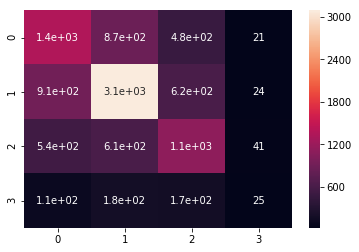

In [73]:
clf = train_classifier(bc, x_train, y_train)
pred = predict_labels(bc,x_test)
pred_scores.append(('Bagging Classifier', [accuracy_score(y_test,pred)*100]))
pds.append(accuracy_score(y_test,pred)*100)
print('Accuracy: ',clf.score(x_test, y_test)*100)
cm = confusion_matrix(y_test, pred)
print('Confusion Matrix: \n',cm)
print('\nHeatmap for Confusion Matrix:')
sn.heatmap(cm, annot=True)

0.53715916921
[[1307  892  492   34]
 [ 910 3061  609   62]
 [ 541  652 1063   57]
 [ 104  180  169   26]]


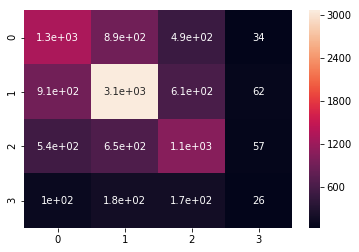

In [74]:
clf = train_classifier(etc, x_train, y_train)
pred = predict_labels(etc,x_test)
pred_scores.append(('ETC', [accuracy_score(y_test,pred)]))
print(clf.score(x_test, y_test))
cm = confusion_matrix(y_test, pred)
print(cm)
sn.heatmap(cm, annot=True)

Accuracy:  54.8183876366
Confusion Matrix: 
 [[1359  894  456   16]
 [ 901 3122  601   18]
 [ 532  669 1075   37]
 [  93  190  183   13]]

Heatmap for Confusion Matrix:


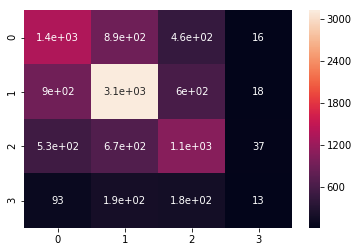

In [75]:
clf = train_classifier(rfc, x_train, y_train)
pred = predict_labels(rfc,x_test)
pred_scores.append(('Random Forest Classifier', [accuracy_score(y_test,pred)*100]))
pds.append(accuracy_score(y_test,pred)*100)
print('Accuracy: ',clf.score(x_test, y_test)*100)
cm = confusion_matrix(y_test, pred)
print('Confusion Matrix: \n',cm)
print('\nHeatmap for Confusion Matrix:')
sn.heatmap(cm, annot=True)

Accuracy:  46.7664140171
Confusion Matrix: 
 [[ 522 1886  317    0]
 [ 468 3689  485    0]
 [ 332 1441  540    0]
 [  51  297  131    0]]

Heatmap for Confusion Matrix:


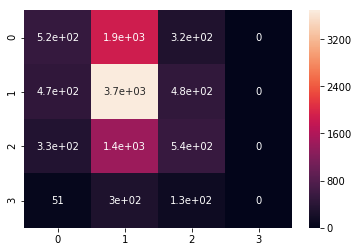

In [76]:
clf = train_classifier(lrc, x_train, y_train)
pred = predict_labels(lrc,x_test)
pred_scores.append(('Logistic Regression Classifier', [accuracy_score(y_test,pred)*100]))
pds.append(accuracy_score(y_test,pred)*100)
print('Accuracy: ',clf.score(x_test, y_test)*100)
cm = confusion_matrix(y_test, pred)
print('Confusion Matrix: \n',cm)
print('\nHeatmap for Confusion Matrix:')
sn.heatmap(cm, annot=True)

Accuracy:  53.3320208682
Confusion Matrix: 
 [[1106 1112  507    0]
 [ 758 3252  629    3]
 [ 437  815 1060    1]
 [  79  234  166    0]]

Heatmap for Confusion Matrix:


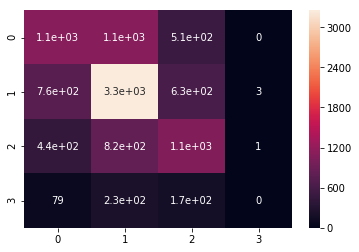

In [77]:
clf = train_classifier(dtc, x_train, y_train)
pred = predict_labels(dtc,x_test)
pred_scores.append(('Decision Tree Classifier', [accuracy_score(y_test,pred)*100]))
pds.append(accuracy_score(y_test,pred)*100)
print('Accuracy: ',clf.score(x_test, y_test)*100)
cm = confusion_matrix(y_test, pred)
print('Confusion Matrix: \n',cm)
print('\nHeatmap for Confusion Matrix:')
sn.heatmap(cm, annot=True)

Accuracy:  51.737375726
Confusion Matrix: 
 [[1261 1122  342    0]
 [ 907 3297  438    0]
 [ 581 1034  698    0]
 [ 116  247  116    0]]

Heatmap for Confusion Matrix:


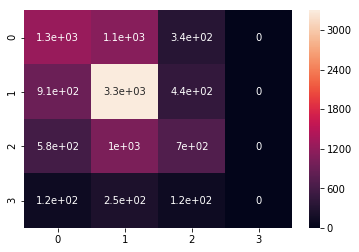

In [78]:
clf = train_classifier(knc, x_train, y_train)
pred = predict_labels(knc,x_test)
pred_scores.append(('K-nearest Neighbors Classifier', [accuracy_score(y_test,pred)*100]))
pds.append(accuracy_score(y_test,pred)*100)
print('Accuracy: ',clf.score(x_test, y_test)*100)
cm = confusion_matrix(y_test, pred)
print('Confusion Matrix: \n',cm)
print('\nHeatmap for Confusion Matrix:')
sn.heatmap(cm, annot=True)

In [79]:
scores = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Accuracy Score'])
scores

,Accuracy Score
ABC,0.525249
Bagging Classifier,54.966040
ETC,0.537159
Random Forest Classifier,54.818388
Logistic Regression Classifier,46.766414
Decision Tree Classifier,53.332021
K-nearest Neighbors Classifier,51.737376


In [80]:
pds

[54.966039964563443,
 54.8183876365784,
 46.766414017127673,
 53.332020868195684,
 51.737375725957278]

In [81]:
import numpy as np

In [82]:
label = ['Bagging Classifier','Random Forest', 'Logistic Regression', 'Decision Tree','K-nearest Neighbor']

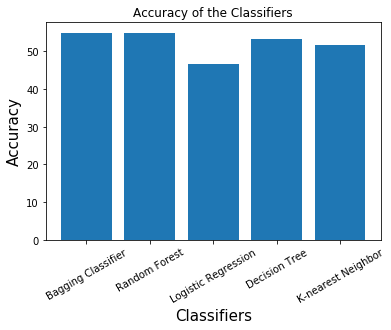

In [83]:
index = np.arange(len(label))
plt.bar(index, pds)
plt.xlabel('Classifiers', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.xticks(index, label, fontsize=10, rotation=30)
plt.title('Accuracy of the Classifiers')

In [84]:
kfold = StratifiedKFold(n_splits=20, shuffle=True, random_state=None)

In [85]:
pred_score = []

In [86]:
score = cross_val_score(rfc, result.drop('illness_type', axis=1), result['illness_type'], cv = kfold, scoring = "accuracy", n_jobs=3)

In [87]:
score

array([ 0.55778302,  0.54304245,  0.54867257,  0.53274336,  0.54309327,
        0.52302243,  0.54518606,  0.56290608,  0.55522741,  0.5463674 ,
        0.54787234,  0.56382979,  0.54373522,  0.56146572,  0.55378251,
        0.56146572,  0.53841608,  0.56323877,  0.56501182,  0.54609929])

In [88]:
score.max()*100

56.501182033096931

In [89]:
pred_score.append(score.max()*100)

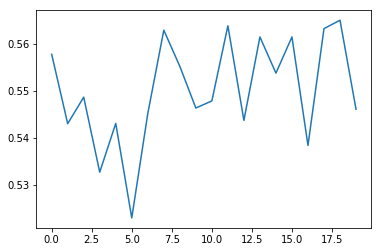

In [90]:
plt.plot(score)

In [91]:
score.mean()*100

55.014806536567349

In [92]:
pred_score

[56.501182033096931]

In [93]:
score = cross_val_score(knc, result.drop('illness_type', axis=1), result['illness_type'], cv = kfold, scoring = "accuracy", n_jobs=3)

In [94]:
score

array([ 0.50707547,  0.53007075,  0.53569322,  0.49970501,  0.51416765,
        0.53246753,  0.53809805,  0.5280567 ,  0.52215003,  0.53632605,
        0.52364066,  0.51004728,  0.51536643,  0.5070922 ,  0.53368794,
        0.51359338,  0.51300236,  0.53782506,  0.53309693,  0.5212766 ])

In [95]:
score.max()*100

53.809805079740102

In [96]:
pred_score.append(score.max()*100)

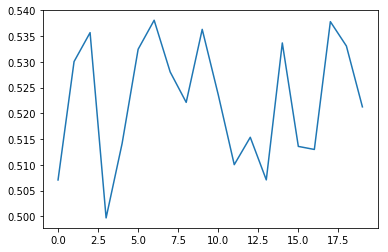

In [97]:
plt.plot(score)

In [98]:
score.mean()*100

52.262196569755424

In [99]:
pred_score

[56.501182033096931, 53.809805079740102]

In [100]:
score = cross_val_score(dtc, result.drop('illness_type', axis=1), result['illness_type'], cv = kfold, scoring = "accuracy", n_jobs=3)

In [101]:
score

array([ 0.53125   ,  0.51768868,  0.52743363,  0.5280236 ,  0.5283353 ,
        0.52184179,  0.5280567 ,  0.54577673,  0.54932073,  0.53337271,
        0.52600473,  0.53605201,  0.53546099,  0.5248227 ,  0.53427896,
        0.52068558,  0.52955083,  0.54137116,  0.56382979,  0.54550827])

In [102]:
score.max()*100

56.38297872340425

In [103]:
score.mean()*100

53.343324446025342

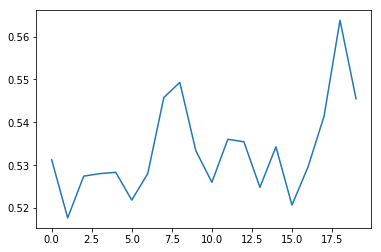

In [104]:
plt.plot(score)

In [105]:
pred_score.append(score.max()*100)

In [106]:
pred_score

[56.501182033096931, 53.809805079740102, 56.38297872340425]

In [107]:
labels = ['random Forest', 'K-nearest Neighbors', 'Decision Tree']

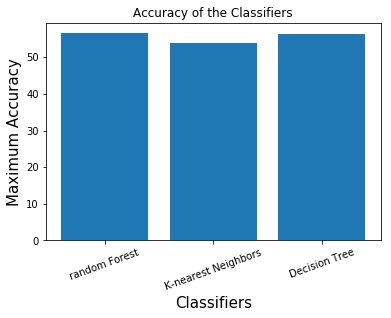

In [108]:
index = np.arange(len(labels))
plt.bar(index, pred_score)
plt.xlabel('Classifiers', fontsize=15)
plt.ylabel('Maximum Accuracy', fontsize=15)
plt.xticks(index, labels, fontsize=10, rotation=20)
plt.title('Accuracy of the Classifiers')

### Grid Search

In [16]:
from sklearn.model_selection import GridSearchCV

In [30]:
rf = RandomForestClassifier(random_state=42,n_jobs=-1)

In [31]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [32]:
CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
CV_rfc.fit(result.drop('illness_type', axis=1), result['illness_type'])
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'log2',
 'n_estimators': 500}

In [34]:
rf = RandomForestClassifier(n_estimators = 500,max_depth= 6, max_features= 'log2', criterion= 'entropy',random_state=42,n_jobs=-1)

In [35]:
score = cross_val_score(rf, result.drop('illness_type', axis=1), result['illness_type'], cv = kfold, scoring = "accuracy", n_jobs=-1)

In [36]:
score

array([ 0.74405155,  0.74107733,  0.74549661,  0.74533135,  0.74429752,
        0.74347107,  0.74607373,  0.74140212,  0.74272487,  0.74222884,
        0.74516289,  0.74301306,  0.74483215,  0.74417066,  0.74665123,
        0.74632049,  0.74731272,  0.74417066,  0.74962791,  0.74598975])

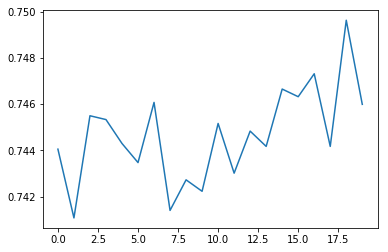

In [37]:
plt.plot(score)

In [38]:
score.mean()

0.74467032606803396